# EDA

---

### 1. Problema de Negocio:

- Me ha sido asignada la tarea de realizar un análisis completo que me permita reconocer el comportamiento del sector de las telecomunicaciones a nivel nacional. La empresa para la que trabajo es una prestadora de servicios de telecomunicaciones, y su principal actividad es brindar acceso a internet. Sin embargo, también es importante tener en cuenta el comportamiento asociado a los demás servicios de comunicación.

- El objetivo de este análisis es orientar a la empresa en la mejora de la calidad de sus servicios, identificar oportunidades de crecimiento y poder ofrecer soluciones personalizadas a los posibles clientes. Para lograr esto, debo examinar detalladamente el mercado de las telecomunicaciones a nivel nacional, considerando factores como la demanda de servicios de internet, telefonía, televisión y otros servicios de comunicación.

- Será necesario recopilar datos relevantes sobre el comportamiento de los consumidores, las tendencias del mercado, la competencia y las regulaciones vigentes en el sector. A partir de esta información, podré realizar un análisis exhaustivo que me permita identificar patrones, tendencias y oportunidades que ayuden a la empresa a tomar decisiones estratégicas informadas.

- Mi objetivo final es proporcionar a la empresa recomendaciones sólidas y basadas en evidencia para mejorar la calidad de sus servicios, captar nuevos clientes y optimizar su crecimiento en el mercado de las telecomunicaciones.


### 2. El set de datos despues de la limpieza


- Previamente se agruparon todos los datasets en 3 csv. Con unas dimensiones de: (4453x27), (1391, 103) y (1391, 103) cuyos nombres son: Analysis_geo_cuant, Analysis_geo_global y Analysis_geo_temp respectivamente.


#### 2.1 Descripcion de los campos de los datasets:

##### **`Analysis_geo_cuant`**

1. "Año" (Object): El año en el que se registró la información.
2. "Trimestre" (Object): El trimestre al que corresponde la información.
3. "ADSL" (Int): El número de conexiones de internet a través de ADSL.
4. "Cablemodem" (Int): El número de conexiones de internet a través de cablemódem.
5. "Fibra óptica" (Int): El número de conexiones de internet a través de fibra óptica.
6. "Wireless" (Int): El número de conexiones de internet inalámbricas.
7. "Otros" (Int): El número de conexiones de internet de otros tipos.
8. "Total" (Int): El total de conexiones de internet en el período especificado.
9. "Periodo" (Object): El período de tiempo al que corresponde la información.
10. "Velocidad (Mbps)" (Object): La velocidad de conexión a internet en Mbps.
11. "OTROS" (Int): El número de conexiones de internet de otros tipos.
12. "Banda ancha fija" (Int): El número de conexiones de internet de banda ancha fija.
13. "Dial up" (Int): El número de conexiones de internet a través de acceso telefónico (Dial-up).
14. "Provincia" (Object): El nombre de la provincia correspondiente a la ubicación de la conexión.
15. "Partido" (Object): El nombre del partido o distrito correspondiente a la ubicación de la conexión.
16. "Localidad" (Object): El nombre de la localidad correspondiente a la ubicación de la conexión.
17. "4G" (Int): El número de conexiones de telefonía móvil de cuarta generación (4G).
18. "3G" (Int): El número de conexiones de telefonía móvil de tercera generación (3G).
19. "TELEFONIAFIJA" (Int): El número de líneas telefónicas fijas.
20. "SATELITAL" (Int): El número de conexiones de internet satelital.

##### **`Analysis_geo_Global`**

1. "Año" (Object): El año en el que se registró la información.
2. "Trimestre" (Object): El trimestre al que corresponde la información.
3. "Provincia" (Object): El nombre de la provincia correspondiente a la ubicación de la conexión.
4. "Otros" (Int): El número de conexiones de internet de otros tipos.
5. "Trimestre.1" (Object): El trimestre al que corresponde la información.
6. "Ingresos (miles de pesos)" (Object): Los ingresos en miles de pesos.
7. "Periodo" (Object): El período de tiempo al que corresponde la información.
8. "Accesos por cada 100 hogares" (Object): El número de accesos a internet por cada 100 hogares.

##### **`Analysis_geo_temp`**

1. "Año" (Object): El año en el que se registró la información.
2. "Trimestre" (Object): El trimestre al que corresponde la información.
3. "Provincia" (Object): El nombre de la provincia correspondiente a la ubicación de la conexión.
4. "Otros" (Int): El número de conexiones de internet de otros tipos.
5. "Trimestre.1" (Object): El trimestre al que corresponde la información.
6. "Ingresos (miles de pesos)" (Object): Los ingresos en miles de pesos.
7. "Periodo" (Object): El período de tiempo al que corresponde la información.
8. "Accesos por cada 100 hogares" (Object): El número de accesos a internet por cada 100 hogares.


#### 3. Lectura de los Datasets:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from display_utils import display_scrollable_dataframe
from pandas_profiling import ProfileReport

/usr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_1932/2039611898.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [17]:
df_Analysis_geo_cuant=pd.read_csv('../Datasets/Data_proceses/Analysis_geo_cuant.csv')
penetracion=pd.read_csv('../Datasets/Data_ingested/Internet_Penetracion.csv')
df_tecnologias=pd.read_csv('../Datasets/Data_ingested/Internet_Accesos-por-tecnologia.csv')
df_Analysis_geo_global=pd.read_csv('../Datasets/Data_proceses/Analysis_geo_global.csv')
df_Analysis_geo_temp=pd.read_csv('../Datasets/Data_proceses/Analysis_geo_temp.csv')

#### 3.1 Pandas Profiling to EDA


In [5]:
prof = ProfileReport(df_Analysis_geo_cuant)
prof.to_file(output_file='/Archivos_EDA/Metricas_Analis_geo_cuant.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 90.23it/s]


In [6]:
prof1 = ProfileReport(df_Analysis_geo_global)
prof1.to_file(output_file='Archivos_EDA/Metricas_Analis_geo_global.html')

Summarize dataset:  97%|█████████▋| 113/116 [00:44<00:04,  1.63s/it, Detecting duplicates]                          /home/mkm/.local/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/home/mkm/.local/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/home/mkm/.local/lib/python3.11/site-packages/ydata_profil

In [8]:
prof2 = ProfileReport(df_Analysis_geo_temp)
prof2.to_file(output_file='Archivos_EDA/Metricas_Analis_geo_temp.html')

Summarize dataset:  97%|█████████▋| 113/116 [00:40<00:02,  1.10it/s, Detecting duplicates]                          /home/mkm/.local/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/home/mkm/.local/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/home/mkm/.local/lib/python3.11/site-packages/ydata_profil

In [6]:
display_scrollable_dataframe(df_Analysis_geo_cuant.head(100))

,Unnamed: 0,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,...,OTROS,Banda ancha fija,Dial up,Provincia,Partido,Localidad,4G,3G,TELEFONIAFIJA,SATELITAL
0,0,2022.0,3.0,1.395.277,6.031.970,2.871.541,557.110000,235.230000,11.091.128,Jul-Sept 2022,...,253.312874,7.842.778,19.869249,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
1,1,2022.0,2.0,1.468.333,5.979.214,2.723.285,556.243000,231.609000,10.958.684,Abr-Jun 2022,...,248.001150,7.842.778,25.870584,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
2,2,2022.0,1.0,1.533.240,6.073.426,2.219.533,545.814000,251.996000,10.624.009,Ene-Mar 2022,...,38.909324,7.842.778,33.125116,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
3,3,2021.0,4.0,1.657.615,5.984.240,2.072.236,523.107000,252.596000,10.489.794,Oct-Dic 2021,...,257.016218,7.842.778,32.860607,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
4,4,2021.0,3.0,1.950.631,5.826.257,1.566.048,492.415000,250.190000,10.085.541,Jul-Sept 2021,...,331.131535,7.842.778,10.491575,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2016.0,2.0,SI,2.756.294,226.285,252.204317,78.579458,7.172.464,Oct-Dic 2014,...,0.000000,7.842.778,7.697509,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
96,96,2016.0,1.0,SI,2.756.294,226.285,337.477981,56.079889,6.835.285,Oct-Dic 2014,...,0.000000,7.842.778,29.781692,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
97,97,2015.0,4.0,SI,2.756.294,226.285,-28.027479,214.824011,6.916.766,Oct-Dic 2014,...,0.000000,7.842.778,22.881140,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI
98,98,2015.0,3.0,SI,2.756.294,226.285,22.831572,183.134760,6.852.988,Oct-Dic 2014,...,0.000000,7.842.778,10.135929,BUENOS AIRES,La Capital,San Enrique,SI,SI,SI,SI


In [7]:
display_scrollable_dataframe(df_Analysis_geo_global.head(100))

,Unnamed: 0,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps",...,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps,Mbps (Media de bajada),Trimestre.1,Ingresos (miles de pesos),Periodo,Accesos por cada 100 hogares
0,0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,...,223,- 0,1,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
1,1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,...,8,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
2,2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
3,3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
4,4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2021.0,4.0,Tucumán,240,- 0,- 0,- 0,19,20,...,- 0,- 0,- 0,1,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
96,96,2021.0,3.0,Buenos Aires,"9,728",18,- 0,- 0,"37,007",168,...,66,- 0,1,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
97,97,2021.0,3.0,Capital Federal,- 0,31,- 0,- 0,228,36,...,8,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
98,98,2021.0,3.0,Catamarca,"2,206",- 0,- 0,- 0,34,37,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"


In [8]:
display_scrollable_dataframe(df_Analysis_geo_temp.head(100))

,Unnamed: 0,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps",...,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps,Mbps (Media de bajada),Trimestre.1,Ingresos (miles de pesos),Periodo,Accesos por cada 100 hogares
0,0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,...,223,- 0,1,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
1,1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,...,8,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
2,2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
3,3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
4,4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2021.0,4.0,Tucumán,240,- 0,- 0,- 0,19,20,...,- 0,- 0,- 0,1,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
96,96,2021.0,3.0,Buenos Aires,"9,728",18,- 0,- 0,"37,007",168,...,66,- 0,1,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
97,97,2021.0,3.0,Capital Federal,- 0,31,- 0,- 0,228,36,...,8,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"
98,98,2021.0,3.0,Catamarca,"2,206",- 0,- 0,- 0,34,37,...,- 0,- 0,- 0,- 0,- 0,"52,34",Jul-Sept 2020,14.319.467,Abr-Jun 2016,"55,75"


- 3.1 Heatmap


In [2]:
import matplotlib.pyplot as plt


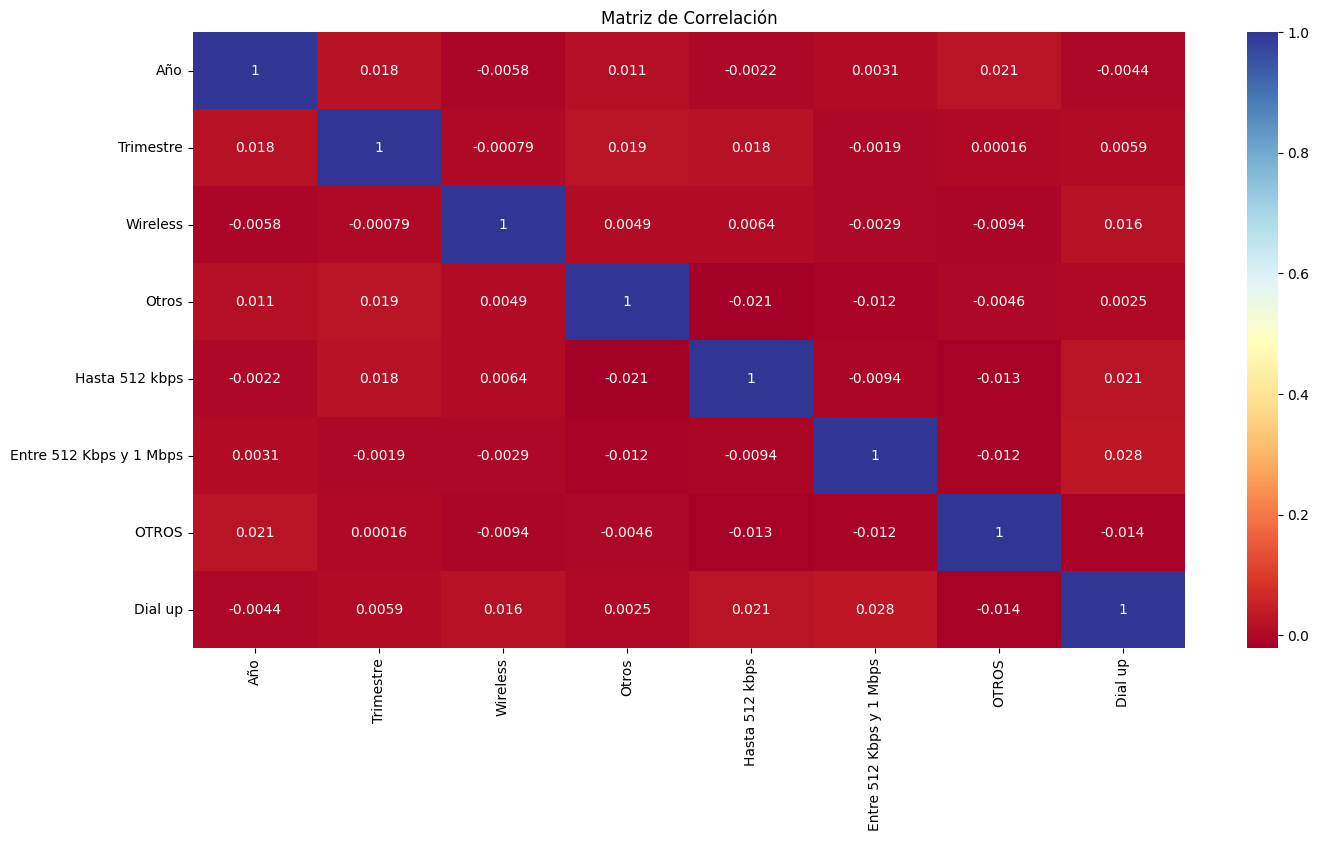

In [6]:
# Para Analysis_geo_cuant

# Crear una copia del DataFrame sin la columna 'id'
df_Analysis_geo_cuant_t = df_Analysis_geo_cuant.drop('Unnamed: 0', axis=1)

# Seleccionar las columnas numéricas del DataFrame temporal
data_num = df_Analysis_geo_cuant_t.select_dtypes(exclude=['object'])

# Calcular la matriz de correlación
correlation_matrix = data_num.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Matriz de Correlación')
plt.show()


### Los otros dataframes no se visualizaran de esta fomra por que las variables numericas son trimestre y año. No tienen relacion ni informacion util


### **`Analysis_geo_cuant`**


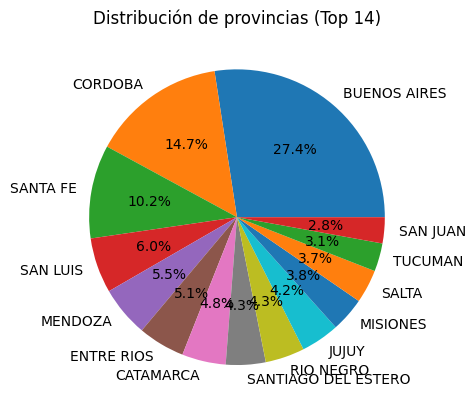

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt

# Obtener las 14 provincias más relevantes
provincias_relevantes = df_Analysis_geo_cuant['Provincia'].value_counts().nlargest(14).index

# Filtrar el DataFrame para incluir solo las provincias relevantes
df_provincias_relevantes = df_Analysis_geo_cuant[df_Analysis_geo_cuant['Provincia'].isin(provincias_relevantes)]

# Crear el gráfico de pastel para las provincias relevantes
df_provincias_relevantes['Provincia'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de provincias (Top 14)')
plt.ylabel('')
plt.show()




![grapghi](../src/output.png)


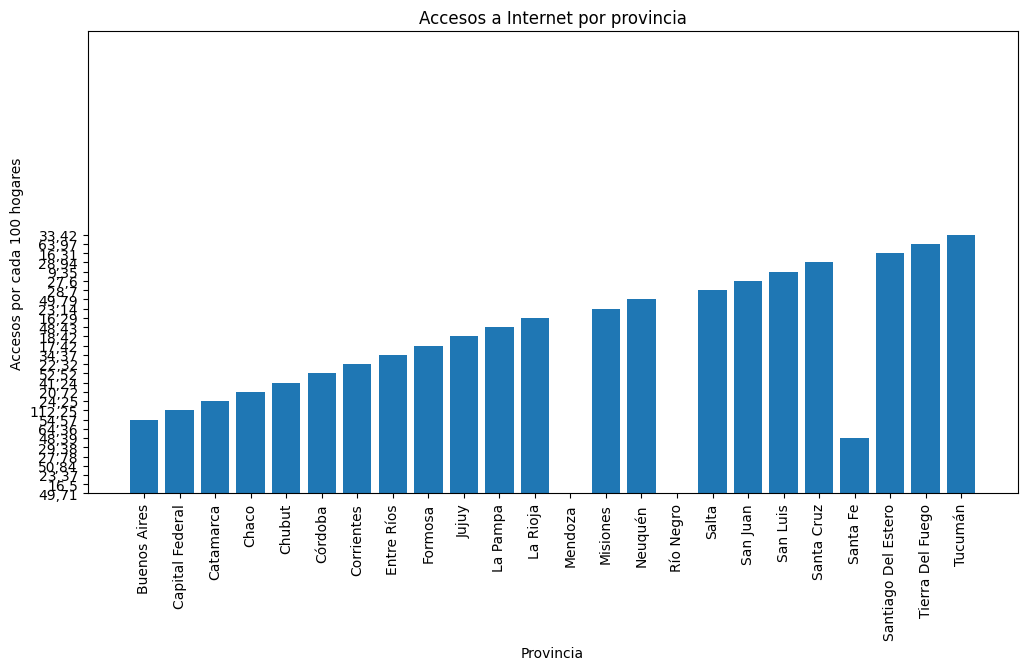

In [15]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(penetracion['Provincia'], penetracion['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos a Internet por provincia')
plt.xticks(rotation=90)
# Establecer límites en el eje y para mostrar solo los valores más altos
plt.ylim(bottom=750, top=800)  # Ajusta los valores según tus necesidades

plt.show()


#### Luego de ver los graficos y tendencias de Este Eda y El Eda proporcionado por Pandas Profiling. Se obseva que buenos aires tiene una buena infraestructura, buena tasa media de descarga. Por otro lado, Por ejemplo provincias como tierra del fuego tienen buena insfraestrutura pero baja tasa media de descarga. lo que implica un bajo uso del sistema. Por eso se enfocaron los Kpis en conseguir mejores resultados en este tipo de provincias, entonces:


##### KPIs Selecionados:

- Crecimiento de un 3% anual por provincia
- Aumento de un 3% en Fibra optica
- Crecimiento de un 5 % en accesos por cada 100 Hogares.


---
